In [214]:
# import from professor
import keras
# from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
# my imports
import cv2
from pathlib import Path
import os
import pandas as pd
from sklearn.model_selection import train_test_split


## Passo a passo
1. Fazer o resize em todas as imagens
2. Definir o conjunto de mesmos tipos
3. Definir o cojunto geral

In [276]:
# Verificando o menor tamanho de todas as imagens

MAIN_DIR = "./Nonsegmented"
main_path = Path(MAIN_DIR)

min_from_fodler = []

for folder in main_path.iterdir():
    current_images = []
    if folder.is_dir():
        for image_path in folder.iterdir():
            if image_path.is_file():
                img = cv2.imread(str(image_path))
                current_images.append(img.shape[0])
        # print(current_images)
        min_from_fodler.append(min(current_images))
                

print(len(min_from_fodler))
print(min_from_fodler)

12
[49, 121, 66, 55, 54, 71, 63, 51, 73, 54, 49, 62]


In [277]:
# Creating a new folder with resized images

# Define the main directory containing the images
OUTPUT_DIR = "./Nonsegmented-resized"  # Path to save resized images
TARGET_SIZE = (64, 64)  # Desired dimensions (width, height)

# Create the output directory if it doesn't exist
if not Path(OUTPUT_DIR).exists():
    Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)

# Loop through each folder and image
main_path = Path(MAIN_DIR)

for folder in main_path.iterdir():
    if folder.is_dir():
        # Create corresponding output folder
        output_folder = Path(OUTPUT_DIR) / folder.name
        output_folder.mkdir(parents=True, exist_ok=True)
        
        for image_path in folder.iterdir():
            if image_path.is_file():
                try:
                    # Read the image
                    img = cv2.imread(str(image_path))
                    if img is not None:
                        # Resize the image to 32x32
                        resized_img = cv2.resize(img, dsize=TARGET_SIZE, interpolation=cv2.INTER_CUBIC)
                        # Define output path
                        output_image_path = output_folder / image_path.name
                        # Save the resized image
                        cv2.imwrite(str(output_image_path), resized_img)
                        print(f"Resized and saved: {output_image_path}")
                    else:
                        print(f"Failed to read: {image_path}")
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")

print(f"Resized images saved to {OUTPUT_DIR}")

Resized and saved: Nonsegmented-resized/Sugar beet/2.png
Resized and saved: Nonsegmented-resized/Sugar beet/272.png
Resized and saved: Nonsegmented-resized/Sugar beet/47.png
Resized and saved: Nonsegmented-resized/Sugar beet/364.png
Resized and saved: Nonsegmented-resized/Sugar beet/409.png
Resized and saved: Nonsegmented-resized/Sugar beet/172.png
Resized and saved: Nonsegmented-resized/Sugar beet/374.png
Resized and saved: Nonsegmented-resized/Sugar beet/167.png
Resized and saved: Nonsegmented-resized/Sugar beet/380.png
Resized and saved: Nonsegmented-resized/Sugar beet/328.png
Resized and saved: Nonsegmented-resized/Sugar beet/231.png
Resized and saved: Nonsegmented-resized/Sugar beet/220.png
Resized and saved: Nonsegmented-resized/Sugar beet/51.png
Resized and saved: Nonsegmented-resized/Sugar beet/362.png
Resized and saved: Nonsegmented-resized/Sugar beet/446.png
Resized and saved: Nonsegmented-resized/Sugar beet/384.png
Resized and saved: Nonsegmented-resized/Sugar beet/12.png
Re

In [278]:
# Verificando o menor tamanho de todas as imagens

main_path = Path(OUTPUT_DIR)

min_from_fodler = []

for folder in main_path.iterdir():
    current_images = []
    if folder.is_dir():
        for image_path in folder.iterdir():
            if image_path.is_file():
                img = cv2.imread(str(image_path))
                current_images.append(img.shape[0])
        # print(current_images)
        min_from_fodler.append(min(current_images))
                

print(len(min_from_fodler))
print(min_from_fodler)

12
[64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]


In [279]:
OUTPUT_DIR = "./Nonsegmented-resized"  # Path to your images directory

# Assign labels to folders
LABELS = {folder.name: idx for idx, folder in enumerate(Path(OUTPUT_DIR).iterdir()) if folder.is_dir()}
train_images, test_images = [], []  # Lists to store train/test images
train_labels, test_labels = [], []  # Lists to store train/test labels

# Loop through folders and images
for folder in Path(OUTPUT_DIR).iterdir():
    if folder.is_dir():
        label = LABELS[folder.name]  # Get the label for this folder
        folder_images = []  # Temporary list for images in this folder
        folder_labels = []  # Temporary list for labels in this folder

        # Collect all images and labels in the folder
        for img_path in folder.iterdir():
            if img_path.is_file():
                try:
                    # Read the image
                    img = cv2.imread(str(img_path))
                    if img is not None:
                        folder_images.append(img)
                        folder_labels.append(label)
                except Exception as e:
                    print(f"Failed to process image {img_path}: {e}")

        # Convert to NumPy arrays
        folder_images = np.array(folder_images)
        folder_labels = np.array(folder_labels)

        # Split into train and test sets for this folder
        folder_train_images, folder_test_images, folder_train_labels, folder_test_labels = train_test_split(
            folder_images, folder_labels, test_size=0.2, random_state=42
        )

        # Add to the global train/test sets
        train_images.extend(folder_train_images)
        test_images.extend(folder_test_images)
        train_labels.extend(folder_train_labels)
        test_labels.extend(folder_test_labels)

In [280]:
# Convert to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels).reshape(-1, 1)
test_images = np.array(test_images)
test_labels = np.array(test_labels).reshape(-1, 1)

# Shuffle the combined train and test datasets
train_indices = np.random.permutation(train_images.shape[0])
train_images = train_images[train_indices]
train_labels = train_labels[train_indices]

test_indices = np.random.permutation(test_images.shape[0])
test_images = test_images[test_indices]
test_labels = test_labels[test_indices]

# Print results
print(f"Train Images: {train_images.shape[0]}, Test Images: {test_images.shape[0]}")

Train Images: 4430, Test Images: 1114


In [281]:
import collections

# Check label distribution
train_label_counts = collections.Counter(train_labels.flatten())
test_label_counts = collections.Counter(test_labels.flatten())

print(f"Training label distribution: {train_label_counts}")
print(f"Testing label distribution: {test_label_counts}")


Training label distribution: Counter({np.int64(5): 612, np.int64(4): 570, np.int64(10): 485, np.int64(11): 460, np.int64(3): 430, np.int64(0): 370, np.int64(1): 361, np.int64(2): 268, np.int64(8): 248, np.int64(6): 219, np.int64(9): 205, np.int64(7): 202})
Testing label distribution: Counter({np.int64(5): 154, np.int64(4): 143, np.int64(10): 122, np.int64(11): 116, np.int64(3): 108, np.int64(0): 93, np.int64(1): 91, np.int64(2): 67, np.int64(8): 62, np.int64(6): 55, np.int64(9): 52, np.int64(7): 51})


In [282]:
# Testing code above

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(4430, 64, 64, 3)
(4430, 1)
(1114, 64, 64, 3)
(1114, 1)


In [283]:
print(train_labels[0])

[1]


In [284]:
# Normalizando as imagens
train_images = train_images / 255
test_images = test_images / 255

# Codificação one-hot das etiquetas
NUM_CLASSES = 12
train_labels = to_categorical(train_labels, NUM_CLASSES)
test_labels = to_categorical(test_labels, NUM_CLASSES)

CLASS_NAMES = [folder.name for folder in Path(OUTPUT_DIR).iterdir() if folder.is_dir()]
print(LABELS)
print(CLASS_NAMES)

{'Sugar beet': 0, 'Charlock': 1, 'Cleavers': 2, 'Fat Hen': 3, 'Common Chickweed': 4, 'Loose Silky-bent': 5, 'Shepherd’s Purse': 6, 'Common wheat': 7, 'Black-grass': 8, 'Maize': 9, 'Scentless Mayweed': 10, 'Small-flowered Cranesbill': 11}
['Sugar beet', 'Charlock', 'Cleavers', 'Fat Hen', 'Common Chickweed', 'Loose Silky-bent', 'Shepherd’s Purse', 'Common wheat', 'Black-grass', 'Maize', 'Scentless Mayweed', 'Small-flowered Cranesbill']


In [285]:
print(train_labels[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [351]:
# Criando um modelo sequência e adicionando camadas nele

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64,64,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu')) # retorna um tensor 4D dado por ativação(conv2d(inputs, kernel) + viés).
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))    # num_classes = 10

In [345]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_94 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_111         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_112         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_96 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_113         │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_97 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_114         │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_115         │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,116,012 (4.26 MB)

 Trainable params: 1,115,500 (4.26 MB)

 Non-trainable params: 512 (2.00 KB)

In [346]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [325]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(4430, 64, 64, 3)
(4430, 12)
(1114, 64, 64, 3)
(1114, 12)


In [347]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=30,
                    validation_data=(test_images, test_labels))

Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 272ms/step - accuracy: 0.3504 - loss: 2.1082 - val_accuracy: 0.0458 - val_loss: 3.3418
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 339ms/step - accuracy: 0.7366 - loss: 0.8692 - val_accuracy: 0.0664 - val_loss: 4.5172
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 331ms/step - accuracy: 0.8250 - loss: 0.5902 - val_accuracy: 0.0557 - val_loss: 8.2985
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 334ms/step - accuracy: 0.8937 - loss: 0.4066 - val_accuracy: 0.0943 - val_loss: 4.4974
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 328ms/step - accuracy: 0.9214 - loss: 0.2981 - val_accuracy: 0.1580 - val_loss: 4.4620
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 331ms/step - accuracy: 0.9398 - loss: 0.2427 - val_accuracy: 0.2244 - val_loss: 4.4770
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 328ms/step - accuracy: 0.9592 - loss: 0.1790 - val_accuracy: 0.3348 - val_loss: 2.7375
Epoch 8/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 329ms/step - accuracy: 0.9637 - loss: 0.1614 - val_accu

Text(0.5, 1.0, 'Curvas de perda')

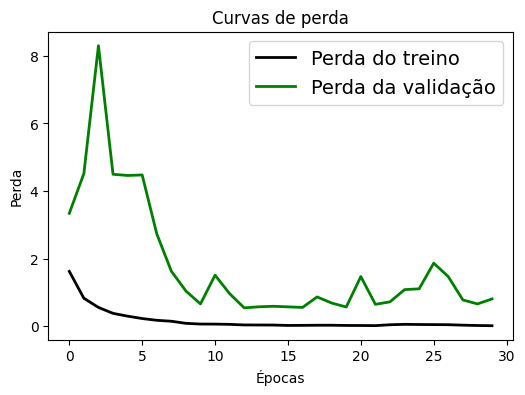

In [349]:
# Curva de perda
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Perda do treino', 'Perda da validação'], fontsize=14)
plt.xlabel('Épocas', fontsize=10)
plt.ylabel('Perda', fontsize=10)
plt.title('Curvas de perda', fontsize=12)

Text(0.5, 1.0, 'Curva de acurácia')

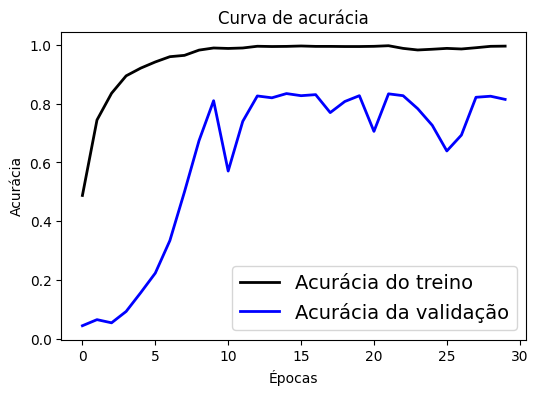

In [350]:
# Curva de acurácia
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Acurácia do treino', 'Acurácia da validação'], fontsize=14)
plt.xlabel('Épocas', fontsize=10)
plt.ylabel('Acurácia', fontsize=10)
plt.title('Curva de acurácia', fontsize=12)

In [329]:
# Fazendo as previsões
pred = model.predict(test_images)
print(pred)

# Convertendo as previsões nos índices das etiquetas
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
[[8.3875592e-04 7.1463815e-05 9.9479957e-03 ... 2.3106574e-03
  9.9997756e-05 7.8314632e-05]
 [1.0937085e-02 4.4515784e-04 2.7224442e-03 ... 8.9120935e-05
  4.3595904e-01 3.2115127e-03]
 [1.1594278e-03 6.3958702e-05 1.9917414e-05 ... 1.1861804e-04
  3.9578471e-03 1.4407441e-03]
 ...
 [7.6291092e-02 1.1118897e-02 1.0817233e-02 ... 2.3974183e-03
  4.0212512e-01 9.9822471e-04]
 [6.4205192e-04 9.1607726e-06 1.7372430e-04 ... 1.2804705e-04
  7.6005887e-04 2.3069514e-04]
 [2.4474148e-01 2.8749171e-03 2.4375825e-03 ... 2.6572286e-03
  8.0217645e-03 1.2575111e-01]]
[7 5 4 ... 6 5 3]


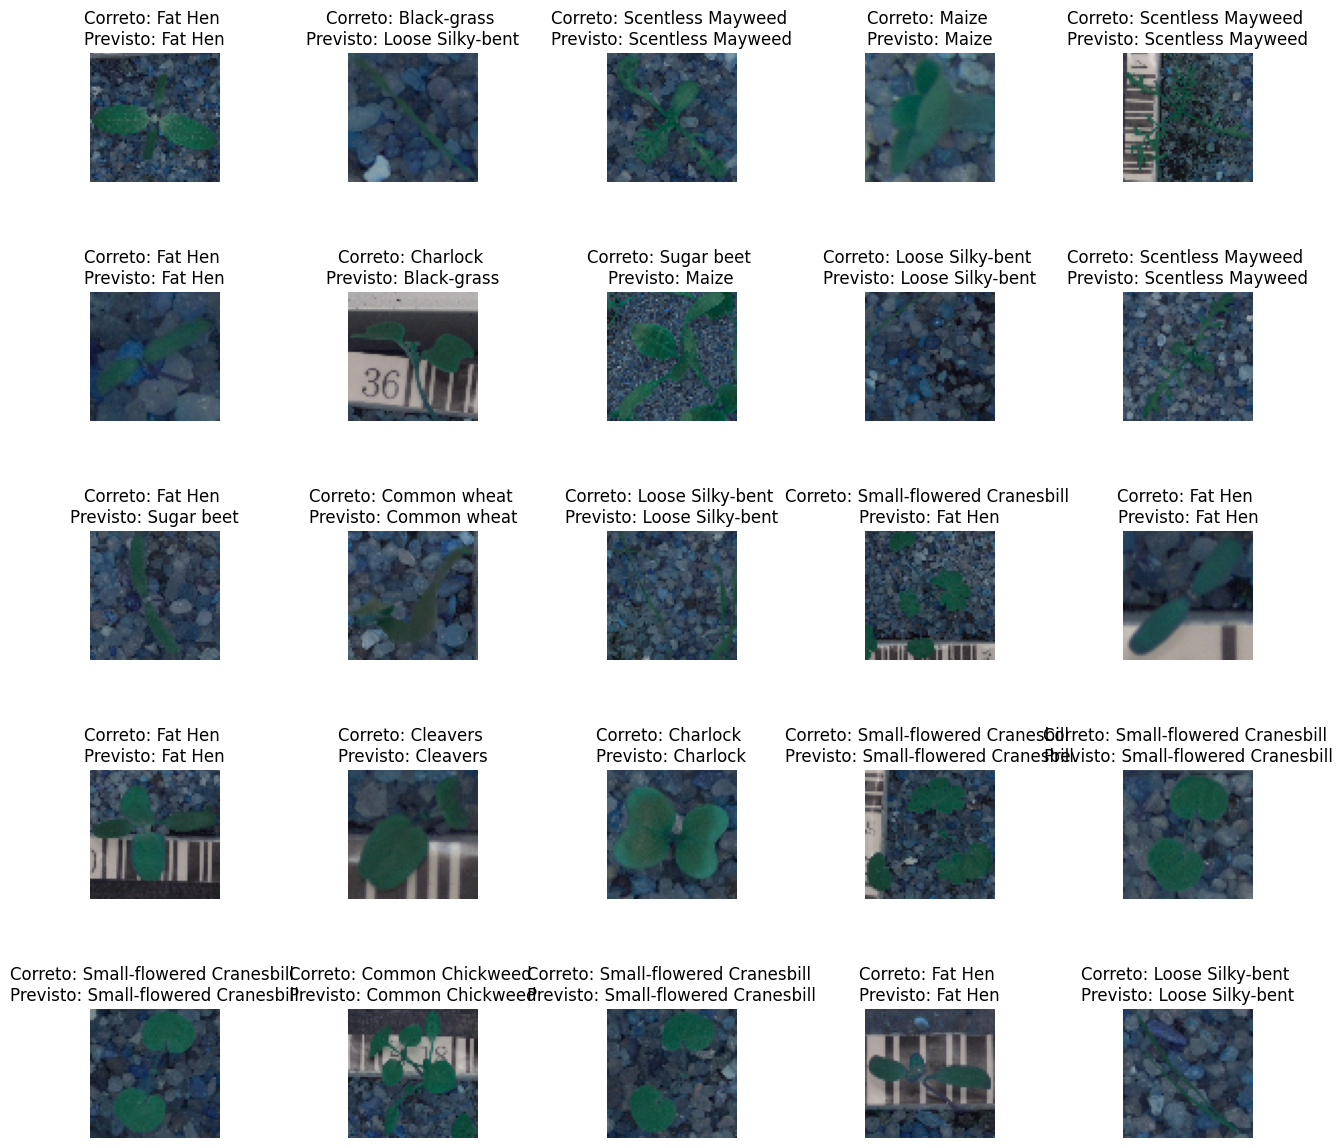

In [330]:
# Mostrando o verdadeiro vs. Resultado previsto

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    random_num = np.random.choice(len(test_images))
    axes[i].imshow(test_images[random_num])
    axes[i].set_title("Correto: %s \nPrevisto: %s" % (CLASS_NAMES[np.argmax(test_labels[random_num])], CLASS_NAMES[pred_classes[random_num]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

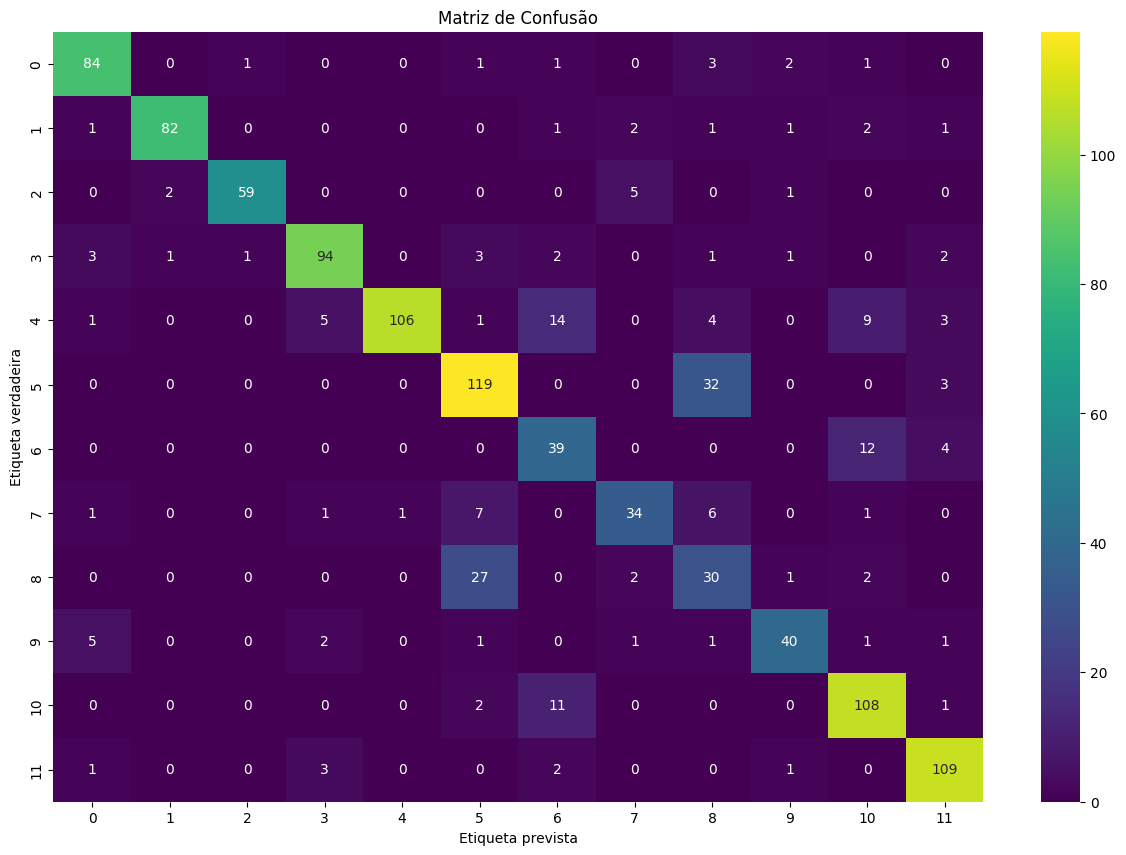

In [342]:
# Gera a matriz de confusão
confusion_mtx = confusion_matrix(np.argmax(test_labels, axis=1), pred_classes)

# Plota a matriz de confusão
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax, cmap="viridis")
ax.set_xlabel("Etiqueta prevista")
ax.set_ylabel("Etiqueta verdadeira")
ax.set_title("Matriz de Confusão");